### **Face Recognition Implementation**

The ability of Machine System to recognize an person's face in an image. We wiil teach the machine how to detect and recognize a face.

We will be using the Open-Source Tool for this purpose, one of them is very famous and extensively used is 'Dlib' that has 'face_recognition' package that gives us access to pre-created models for face-recognition purposes and related use-case projects.

Feature Based Detection:
HOG (Histogram of Oriented Gradients) Feature based: This counts the occurences ofgradient orientation in an image.

In [1]:
#Moving to directory where dataset images are stored
%cd /content/drive/My Drive/Colab Notebooks/Untitled folder

/content/drive/My Drive/Colab Notebooks/Untitled folder


In [2]:
#installing the face_recognition package in python
!pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=e1b9418b16775a085f2e92cb51ba76719a27f1a557eb78e943f697db4faf0bbc
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


**HOG on Images**

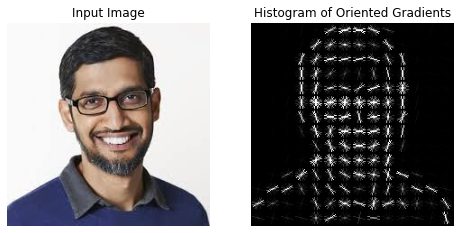

In [3]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, feature, exposure
import cv2

image = cv2.imread('SundarPichai1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fd, hog_image = hog(image, orientations = 8, pixels_per_cell = (16,16), 
                    cells_per_block = (1,1), visualize = True, multichannel = True)

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (8,4), sharex = True, sharey = True)
ax1.axis('off')
ax1.imshow(image, cmap = plt.cm.gray)
ax1.set_title('Input Image')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range = (0,10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap = plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

**FACE DETECTION**: Let us perform face detection first and see if our model identifies correct number of faces in the image.

In [4]:
#Making the necessary imports

import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.pyplot import Circle
import numpy as np
import cv2
%matplotlib inline


Found 3 face(s) in the input image


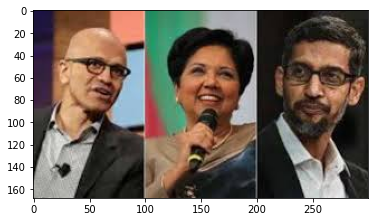

In [5]:
#Displaying the image and showing the number of faces detected in it

image = cv2.imread('3people.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

face_locations = face_recognition.face_locations(image)
num_faces = len(face_locations)
print('Found {} face(s) in the input image'.format(num_faces))

A face is located a pixel location on Left: 128, Top: 39, Right: 190, Bottom: 101
A face is located a pixel location on Left: 212, Top: 38, Right: 287, Bottom: 113
A face is located a pixel location on Left: 31, Top: 25, Right: 93, Bottom: 87


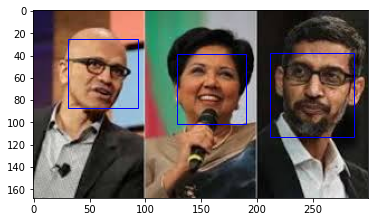

In [6]:
#Detection of faces in the image and drawing rectangles around the faces with generating rectange coordinate information
plt.imshow(image)
ax = plt.gca()

for face_location in face_locations:
  top, right, bottom, left = face_location
  x, y, w, h = left, top, right, bottom
  print('A face is located a pixel location on Left: {}, Top: {}, Right: {}, Bottom: {}'. format(x,y,w,h))

  rect = Rectangle((x,y), w-x, h-y, fill = False, color = 'blue')
  ax.add_patch(rect)

plt.show()

**The Actual Face Recognition**



In [7]:
#Reading in the images from our custom dataset/ Loading images(dataset)

image = cv2.imread('SundarPichai1.jpg')
sundar = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('SatyaNadella.jpg')
satya = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('IndraNooyi.jpg')
indra = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('AjaypalSinghBagha.jpg')
ajaypal = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [8]:
#Generating face encoding for each person

sundar_demo_encoding = face_recognition.face_encodings(sundar)[0]
satya_demo_encoding = face_recognition.face_encodings(satya)[0]
indra_demo_encoding = face_recognition.face_encodings(indra)[0]
ajaypal_demo_encoding = face_recognition.face_encodings(ajaypal)[0]

#Creating database of all known face encodings

known_encodings = [sundar_demo_encoding,
                        satya_demo_encoding,
                        indra_demo_encoding,
                        ajaypal_demo_encoding]


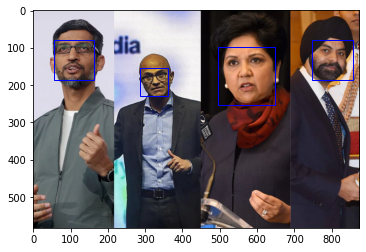

Found Indra Nooyi in the photo!
Found Sundar Pichai in the photo!
Found Ajaypal Singh Bagha in the photo!
Found Satya Nadella in the photo!


In [17]:
#Loading an image which is not present in our dataset for checking
image = cv2.imread('4 people.jpg')
unknown_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_img)

#Rectangles
face_locations = face_recognition.face_locations(image)
ax = plt.gca()
for face_location in face_locations:
  top, right, bottom, left = face_location
  x, y, w, h = left, top, right, bottom

  rect = Rectangle((x,y), w-x, h-y, fill = False, color = 'blue')
  ax.add_patch(rect)

plt.show()
#Generating the face encoding of the person in the image
unknown_encoding = face_recognition.face_encodings(unknown_img)

from scipy.spatial import distance
#For cases when there might be more than one face in the image, we will have to loop over each face
for unknown_face_encoding in unknown_encoding:

  #Computing Euclidean Distance
  results = []
  for known_face_encoding in known_encodings:
    d = distance.euclidean(known_face_encoding, unknown_face_encoding)
    results.append(d)
  threshold = 0.6
  results = np.array(results) <=threshold

  name = 'Unknown'

  if results[0]:
    name = 'Sundar Pichai'
  elif results[1]:
    name = 'Satya Nadella'
  elif results[2]:
    name = 'Indra Nooyi'
  elif results[3]:
    name = 'Ajaypal Singh Bagha'
  print(f'Found {name} in the photo!')